Need to find expression for Energy of muon neutrino, $ E_\nu$, in the lab rest frame as a function of the pion energy, $E_\pi$, and the angle between the neutrino path and the initial proton and pion path, $\theta$.

We consider the pion to be highly relativistic so that $\beta_\pi = v_\pi/c \approx 1$

We use the fact that the Lorentz factor for transformation between the 2 frames is $\gamma_\pi = E_\pi / m_\pi$

The energy of the neutrino in the pion rest frame can be considered a constant given by: $E_\nu^* = \frac{m_\pi^2 - m_\mu^2}{2m_\pi}$

Comparing the 4-vector components of the neutrino in the lab and rest frames gives: $tan\theta = \frac{sin\theta^*}{\gamma_\pi(\beta_\pi+cos\theta^*)}$ which, after using small angle approximations for the trig functions, leads to $\theta \approx \theta^*/2\gamma_\pi$

Then, from the relation $E_\nu = \gamma_\pi E_\nu^*(1 + cos\theta^*)$ and the approximation $
1+\cos\theta^* \approx \frac{2}{1+\gamma^2\theta^2}
$ we finally get:-  $$E_\nu(E_\pi, \theta) = \frac{2\gamma_\pi E_\nu^*}{(1 + \gamma_\pi^2 \theta^2)}$$


In [2]:
import numpy as np
from matplotlib import pyplot as plt

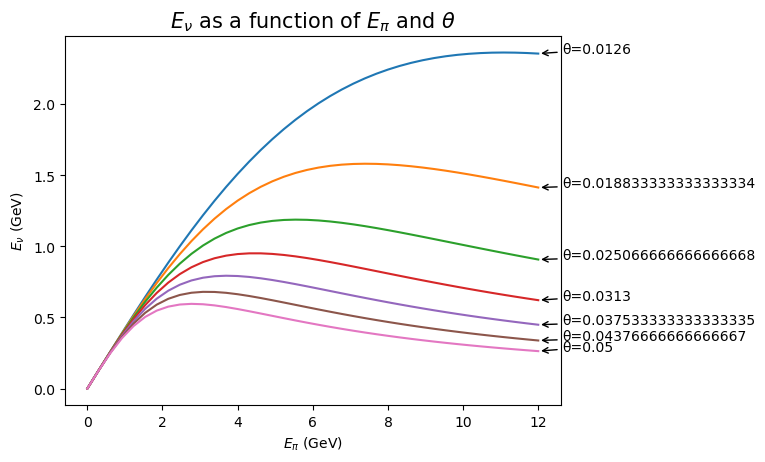

In [18]:

E_star = 29.8
m_pi = 139.6
m_mu = 105.7

def E_from_theta(E_pi, theta=0): 
    gamma = E_pi * 1000 / m_pi   #factor of 1000 as using GeV
    return (.002 * E_star * gamma ) / (1 + (gamma * theta)**2)
    
# Energy range of pions
E_pi = np.linspace(0,12,40)

thetas = np.linspace(0.0126,.05,7)
fig, ax = plt.subplots()

for theta in thetas:
    E_nu = E_from_theta(E_pi, theta)
    ax.plot(E_pi, E_nu)
    ax.annotate("θ="+str(theta), xy=(E_pi[-1], E_nu[-1]), xytext=(E_pi[-1]+.65, E_nu[-1]), 
            arrowprops=dict(arrowstyle="->"))

ax.set_xlabel("$E_\\pi$ (GeV)")
ax.set_ylabel("$E_\\nu$ (GeV)")
plt.title(f"$E_\\nu$ as a function of $E_\\pi$ and $\\theta$", fontsize=15)

#plt.savefig('E_nu for E_pi and theta.pdf',format='pdf')
plt.show()

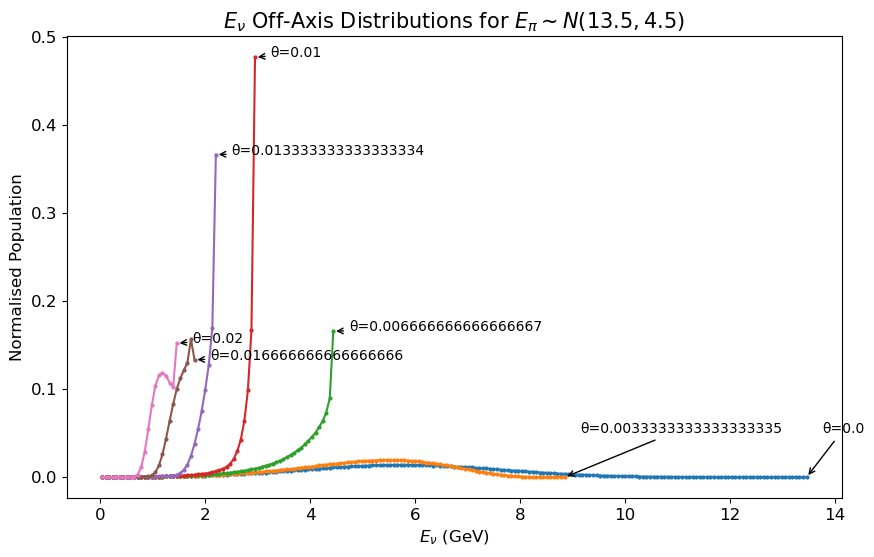

In [16]:
#Assume pion energies sampled from a standard normal distribution and plot population of resulting neutrinos by energy

pion_mean = 13.5
pion_stdv = 4.5
samples = 500000

pions = np.random.normal(loc=pion_mean, scale=pion_stdv, size=samples)
thetas = np.linspace(0,.02,7)
bins = np.linspace(0, pion_mean, 200)
bin_mids = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize=(10, 6))
ax.tick_params(axis='both', which='major', labelsize=12)  

for theta in thetas:
    nus = E_from_theta(pions,theta)
    counts, bin_edges = np.histogram(nus, bins)
    counts = counts/samples  
    x= bin_mids[counts>0]
    y= counts[counts>0]
    ax.plot(x, y,'o-', markersize = 2, label = "θ="+str(theta))
    ax.annotate("θ=" + str(theta), xy=(x[-1], y[-1]), xytext=(x[-1]+.3, max(.05,y[-1])),
                arrowprops=dict(arrowstyle="->"), fontsize=10)

ax.set_xlabel("$E_\\nu$ (GeV)", fontsize=12)
ax.set_ylabel("Normalised Population", fontsize=12)
plt.title(f"$E_\\nu$ Off-Axis Distributions for $E_\\pi \\sim N({pion_mean},{pion_stdv})$", fontsize=15)

#plt.savefig('E_nu for E_pi normal.pdf',format='pdf')
plt.show()